<a href="https://colab.research.google.com/github/Mathieu-Allaire/SIR-model/blob/main/Krasimir_Kirov_Mathieu_Allaire_SIR_sample_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelling Infectious Disease using the SIR model

360-420-DW 

Winter 2022

Assignment 1

Team
 - Krasimir Kirov (Section 3)
 - Mathieu Allaire (Section 3)

March 21st, 2022

# Introduction

In this report, we will compare modified SIR models to the base SIR model. The SIR model is a mathematical description of the evolution of a disease in a population. It takes into account the amount of susceptible, infected and recovered people. We will apply some modifications and add some variables to the base model and see how it affects it. First, we will see how a SIR model with vaccination compares with the base SIR model. Then, we will analyze the differences between the base SIR model and a SIR model that takes into account mortality and re-susceptibility.

# Base Model

Here we simply run the base SIR model studied in class.

Text(0.5, 1.0, 'Base SIR model')

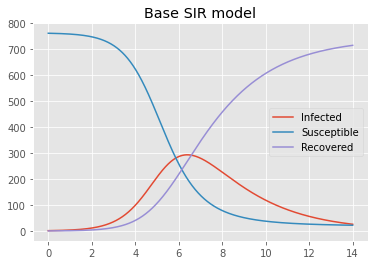

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt

# use `ggplot` style for all plots, which has gray background and gridlines 
plt.style.use('ggplot')

# BASE MODEL
# constants
DT = 0.01
T_MAX = 14
STEPS = int(T_MAX/DT)
BETA = 0.00218
MU = 0.4404

# Initial conditions
S_0 = 762
I_0 = 1
R_0 = 0

# Arrays
T = [0,]
S = [S_0,]
I = [I_0,]
R = [R_0,]

for i in range(STEPS):
  T.append(T[i]+DT)
  S.append(S[i]-BETA*S[i]*I[i]*DT)
  I.append(I[i]+(BETA*S[i]*I[i]-MU*I[i])*DT)
  R.append(R[i]+MU*I[i]*DT)
# Plot the graph
plt.plot(T,I,label='Infected')
plt.plot(T,S,label='Susceptible')
plt.plot(T,R,label='Recovered')
plt.legend()
plt.title("Base SIR model")


# Modification to Model 1: Vaccination

The graphical model shown in the image below shows how we are modelling
- Vaccination: a certain amount of Susceptible(`S`) people will get vaccinated, which results in those people skipping the Infected (`I`) category and going straight to the Recovered(`R`) category at a rate of δ.


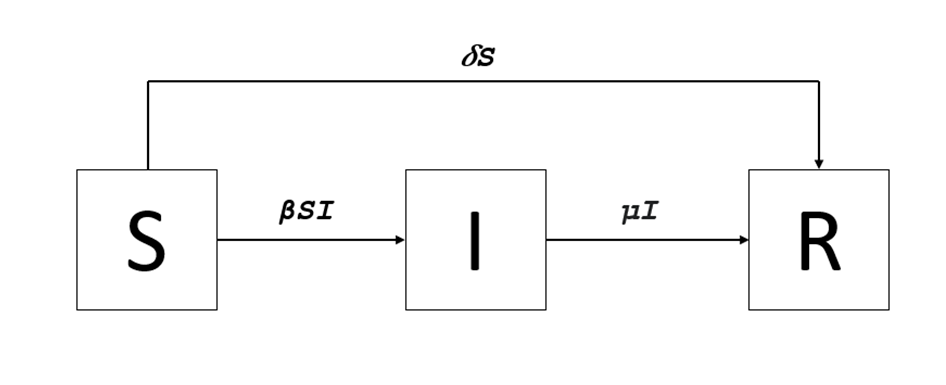

##Model explanation

As shown on the model, vaccination has been added as a new variable. As stated previously, vaccinated people will be considered as recovered, as they cannot be infected anymore once they are vaccinated. We will assume for this particular model that this vaccine only needs a single dose and is 100% effective in killing the virus and providing immunity.

The differential equations governing this graphical model are:

$\frac{dS}{dt}=-βSI-δS $

$\frac{dI}{dt}= βSI-\mu I $

$\frac{dR}{dt}= \mu I+δS $


The Euler method update equations become:

$ S_{i+i}=S_i+(-βS_iI_i-δS_i)*dt $

$I_{i+i}=I_i+(βS_iI_i-\mu I_i)*dt $

$ R_{i+1} =  R_i + (\mu I_i+δS_i)*dt $

##Formula explanation

It is assumed that 1% of the original population will get vaccinated every day. This vaccination rate is higher than the typical daily vaccination rates, but considering the small population and the fast spread of the disease, it was deemed as helpful in order to see how it will affect the model. As explained earlier, (δS[i]dt) was substracted from the number of susceptible people and added to the number of recovered people. This manipulation of the base SIR model did not require an additional array.


##Modification to Model 1
Here we run the modification on Model 1


##Vaccination rate 1 (1%)

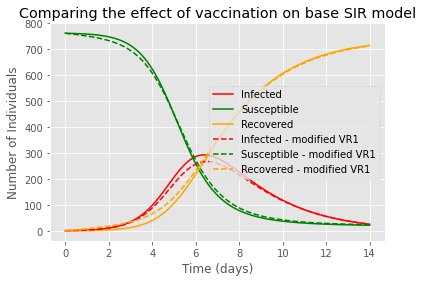

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt

# use `ggplot` style for all plots, which has gray background and gridlines 
plt.style.use('ggplot')

# BASE MODEL
# constants
DT = 0.01
T_MAX = 14
STEPS = int(T_MAX/DT)
BETA = 0.00218
MU = 0.4404

# Initial conditions
S_0 = 762
I_0 = 1
R_0 = 0

# New constant
DELTA = 0.01 #Vaccination rate 1


# Arrays
T = [0,]
Sa = [S_0,]
Ia = [I_0,]
Ra = [R_0,]

for i in range(STEPS):
  T.append(T[i]+DT)
  Sa.append(Sa[i]+(-BETA*Sa[i]*Ia[i]-DELTA*Sa[i])*DT)
  Ia.append(Ia[i]+(BETA*Sa[i]*Ia[i]-MU*Ia[i])*DT)
  Ra.append(Ra[i]+(MU*Ia[i]+DELTA*Sa[i])*DT)

# axis, defined above, has handles for each subplots. We will plot the base model arrays in the first subplot
plt.plot(T,I,label="Infected",c="red")
plt.plot(T,S,label="Susceptible",c="green")
plt.plot(T,R,label="Recovered",c="orange")

# axis, defined above, has handles for each subplots. We will plot the base model arrays in the first subplot
plt.plot(T,Ia,label="Infected - modified VR1",c="red",linestyle="dashed")
plt.plot(T,Sa,label="Susceptible - modified VR1",c="green",linestyle="dashed")
plt.plot(T,Ra,label="Recovered - modified VR1",c="orange",linestyle="dashed")
plt.xlabel("Time (days)")
plt.ylabel("Number of Individuals")
plt.title("Comparing the effect of vaccination on base SIR model")
plt.legend()


##Vaccination rate 2 (5%)

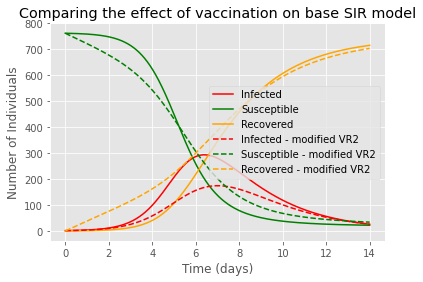

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt

# use `ggplot` style for all plots, which has gray background and gridlines 
plt.style.use('ggplot')

# BASE MODEL
# constants
DT = 0.01
T_MAX = 14
STEPS = int(T_MAX/DT)
BETA = 0.00218
MU = 0.4404

# Initial conditions
S_0 = 762
I_0 = 1
R_0 = 0

# New constant
DELTA_2=0.05 #Vaccination rate 2

T = [0,]
Sa_2 = [S_0,]
Ia_2 = [I_0,]
Ra_2 = [R_0,]

for i in range(STEPS):
  T.append(T[i]+DT)
  Sa_2.append(Sa_2[i]+(-BETA*Sa_2[i]*Ia_2[i]-DELTA_2*Sa_2[i])*DT)
  Ia_2.append(Ia_2[i]+(BETA*Sa_2[i]*Ia_2[i]-MU*Ia_2[i])*DT)
  Ra_2.append(Ra_2[i]+(MU*Ia_2[i]+DELTA_2*Sa_2[i])*DT)

# axis, defined above, has handles for each subplots. We will plot the base model arrays in the first subplot
plt.plot(T,I,label="Infected",c="red")
plt.plot(T,S,label="Susceptible",c="green")
plt.plot(T,R,label="Recovered",c="orange")


# axis, defined above, has handles for each subplots. We will plot the base model arrays in the first subplot
plt.plot(T,Ia_2,label="Infected - modified VR2",c="red",linestyle="dashed")
plt.plot(T,Sa_2,label="Susceptible - modified VR2",c="green",linestyle="dashed")
plt.plot(T,Ra_2,label="Recovered - modified VR2",c="orange",linestyle="dashed")
plt.xlabel("Time (days)")
plt.ylabel("Number of Individuals")
plt.title("Comparing the effect of vaccination on base SIR model")
plt.legend()

##Result analysis
From the graphs, it can be seen that a 1% vaccination rate added to the base SIR model will not significantly change its shape. It will still evolve very similarly. However, a noticeabe impact can be observed on the shape of the base SIR model when there is a 5% vaccination rate. This model indicates that there is an inversely proportional relation between the rate of vaccination and the number of infected people. In fact, the bigger the rate of vaccination per day, the less people will be infected, as there will be less susceptible people. For instance, when there is a 5% vaccination rate, the peak of infection is a little lower than 200 people, whereas for the base model, it was at 300 (this is a 33% drop). Therefore, the model shows how a bigger rate of vaccination in the population can flatten the curve of infections. Nevertheless, it is important to remember that we assumed a vaccine with 100% efficiency and with only a single dose needed to grant immunity, which is rarely the case in real life.

# Modification to Model 2: Mortality and re-susceptibility

The graphical model shown in the image below shows how we are modelling
- Mortality: a certain amount of Infected (`I`) people will die after being infected by the virus, which will result in them bypassing the Recovered (`R`) category and going directly to the Dead (`D`) category at a rate of α.
- Re-susceptibility: a certain amount of Recovered (`R`) people will still be susceptible to catching the disease a second time and thus will go back to the Susceptible (`S`) category at a rate of γ.

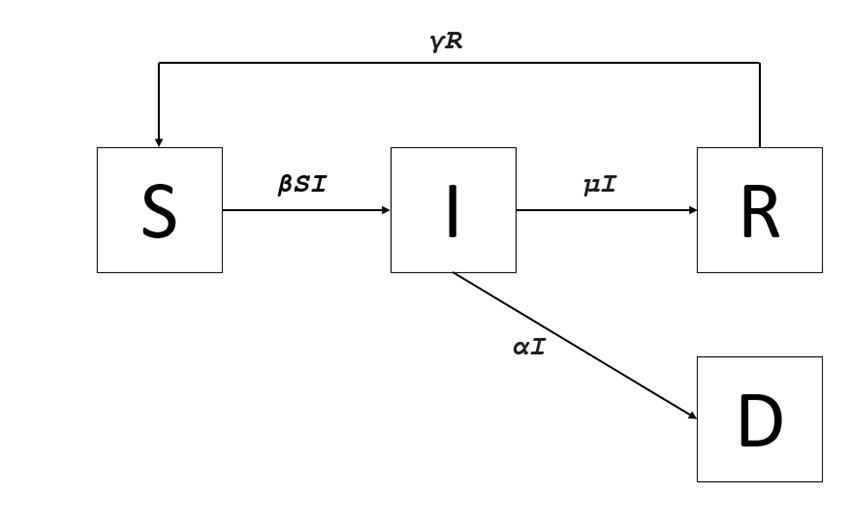

##Model explanation

As shown on the model, death has been added as a new variable in a new box. This box will take infected people who died from the virus. Moreover, re-susceptibility has been added as a variable. In fact, a certain amount of recovered people will go back to being susceptible, as they did not succeed in developping immunity to the virus. No new box was created for re-susceptibility. 

The differential equations governing this graphical model are:

$\frac{dS}{dt}=-βSI+γR $

$\frac{dI}{dt}= βSI-\mu I -αI $

$\frac{dR}{dt}= \mu I-γR $

$\frac{dD}{dt}= αI $

The Euler method update equations become:

$ S_{i+i}=S_i+(-βS_iI_i+γR_i)*dt $

$I_{i+i}=I_i+(βS_iI_i-\mu I_i-αI_i)*dt $

$ R_{i+1} =  R_i + (\mu I_i-γR_i)*dt $

$ D_{i+1} =  D_i + (αI_i)*dt $


##Formula explanation

First, for the death variable, we used a mortality rate of 5% per day. Therefore, every day, 5% of the infected people will go to the dead box in this model. Thus, (αI[i]dt) was added to the number of dead people and substracted from the number of infected people. This manipulation of the base SIR model required an additional array called Dead.
Second, for the re-susceptibility variable, we used a rate of 25% per day. Therefore, every day, 25% of the recovered people will go to the susceptible box in this model. Thus, (γR[i]dt) was added to the number of susceptible people and substracted from the number of recovered people. This manipulation did not require the creation of an additional array. 

##Modification to Model 2
Here we run the modification on Model 2


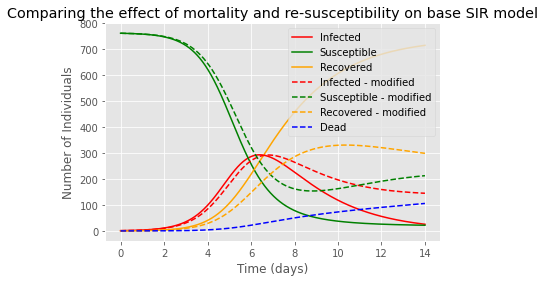

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt

# use `ggplot` style for all plots, which has gray background and gridlines 
plt.style.use('ggplot')

# BASE MODEL
# constants
DT = 0.01
T_MAX = 14
STEPS = int(T_MAX/DT)
BETA = 0.00218
MU = 0.4404

# Initial conditions
S_0 = 762
I_0 = 1
R_0 = 0
D_0=0 #Initially there are no dead people

# New constant
ALPHA= 0.05 #Mortality rate
GAMMA=0.25 #Re-susceptibility rate

# Arrays
T = [0,]
Sb = [S_0,]
Ib = [I_0,]
Rb = [R_0,]
D= [D_0,]
for i in range(STEPS):
  T.append(T[i]+DT)
  Sb.append(Sb[i]+(-BETA*Sb[i]*Ib[i]+GAMMA*Rb[i])*DT)
  Ib.append(Ib[i]+(BETA*Sb[i]*Ib[i]-MU*Ib[i]-ALPHA*Ib[i])*DT)
  Rb.append(Rb[i]+(MU*Ib[i]-GAMMA*Rb[i])*DT)
  D.append(D[i]+(ALPHA*Ib[i])*DT)

# axis, defined above, has handles for each subplots. We will plot the base model arrays in the first subplot
plt.plot(T,I,label="Infected",c="red")
plt.plot(T,S,label="Susceptible",c="green")
plt.plot(T,R,label="Recovered",c="orange")


# axis, defined above, has handles for each subplots. We will plot the base model arrays in the first subplot
plt.plot(T,Ib,label="Infected - modified",c="red",linestyle="dashed")
plt.plot(T,Sb,label="Susceptible - modified",c="green",linestyle="dashed")
plt.plot(T,Rb,label="Recovered - modified",c="orange",linestyle="dashed")
plt.plot(T,D,label="Dead",c="blue",linestyle='dashed')
plt.title("Comparing the effect of mortality and re-susceptibility on base SIR model")
plt.xlabel("Time (days)")
plt.ylabel("Number of Individuals")
plt.legend()

##Result analysis
From the graph, we can see the impacts of death and re-susceptibility on the base model. To begin with, the addition of the death category adds a line on the graph and show that approximatively 100 people will die due to this virus. The fact that people die, joined with the re-susceptibility factor, makes the number of recovered people fall drastically compared to the base model. In fact, the base model finished the period with a little more than 700 people recovered, whereas this modified model finishes the period with only 300 recovered people (this is a 57% drop). Also, the amount of susceptible people at the end of the period is bigger for the modified model. As a matter of fact, there were less than 50 people susceptible in the base model on the last day, compared to approximatively 200 for the modified model. Finally, the number of infected people also became bigger, with approximatively 150 people being infected on the 14th day for the modified model, compared to less than 50 in the base model. A bigger mortality rate (joined with a re-susceptibility rate of 25%) will make the number of infected people and of recovered people decrease, and it will make the number of dead people and of susceptible people increase. On the other hand, a bigger re-susceptibility rate (joined with a mortality rate of 5%) will make the number of infected people, of susceptible people, and of dead people increase, and it will make the number of recovered people decrease. 